In [1]:
import datetime as dt
from datetime import datetime as dtdt

import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import ticker
from matplotlib.dates import DateFormatter, date2num
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime
import japanize_matplotlib

In [2]:
df_0 = pd.read_csv(
    '/Users/iomacbookair2/Documents/lab/DEIM2023/experiment1/thetrad/similarity.csv')
tweet = pd.read_csv(
    '/Users/iomacbookair2/Documents/lab/DEIM2023/experiment1/thetrad/count_exp1.csv')
ex1 = pd.read_csv('/Users/iomacbookair2/Documents/lab/DEIM2023/experiment1/thetrad/thetrad_1.csv')
ex2 = pd.read_csv('/Users/iomacbookair2/Documents/lab/DEIM2023/experiment1/thetrad/thetrad_2.csv')
ex3 = pd.read_csv('/Users/iomacbookair2/Documents/lab/DEIM2023/experiment1/thetrad/thetrad_3.csv')
ex4 = pd.read_csv('/Users/iomacbookair2/Documents/lab/DEIM2023/experiment1/thetrad/thetrad_4.csv')

In [3]:
df = df_0.copy()
# df = df.drop(['Unnamed: 0'], axis=1)[72:95].reset_index()
df = df.drop('q1', axis=1)
df = df.drop('q2', axis=1)
df = df.drop('q3', axis=1)
df = df.drop('stdev', axis=1)
# df = df.drop('counts', axis=1)
# df['created_at'] = pd.to_datetime(df['created_at'])
df['tweet'] = tweet['tweet']
df['ex1'] = ex1['interest']
df['ex2'] = ex2['interest']
df['ex3'] = ex3['interest']
df['ex4'] = ex4['interest']
df['exp'] = df[['ex1', 'ex2', 'ex3', 'ex4']].mean(axis=1)
df['created_at'] = df['created_at'].astype(str)
start_time = df['created_at'].min()
start_time = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
df['created_at'] = df['created_at'].apply(lambda x: (
    datetime.strptime(x, '%Y-%m-%d %H:%M:%S') - start_time).total_seconds() / 60 +1)
df['created_at'] = df['created_at'].apply(lambda x: round(x))
df = df.loc[:14]
df


,created_at,mean,tweet,ex1,ex2,ex3,ex4,exp
0,1,0.359390,5,1.0,2.0,1.0,1.0,1.25
1,2,0.641420,3,1.0,1.0,3.0,1.0,1.50
2,3,0.357207,2,1.0,1.0,2.0,2.0,1.50
3,4,0.540538,7,1.0,2.0,2.0,2.0,1.75
4,5,0.460494,18,2.0,2.0,2.0,1.0,1.75
5,6,0.491038,20,3.0,3.0,2.0,3.0,2.75
6,7,0.488608,31,2.0,2.0,2.0,2.0,2.00
7,8,0.525437,37,2.0,3.0,3.0,2.0,2.50
8,9,0.499504,32,3.0,4.0,3.0,2.0,3.00
9,10,0.491587,30,1.0,2.0,3.0,2.0,2.00


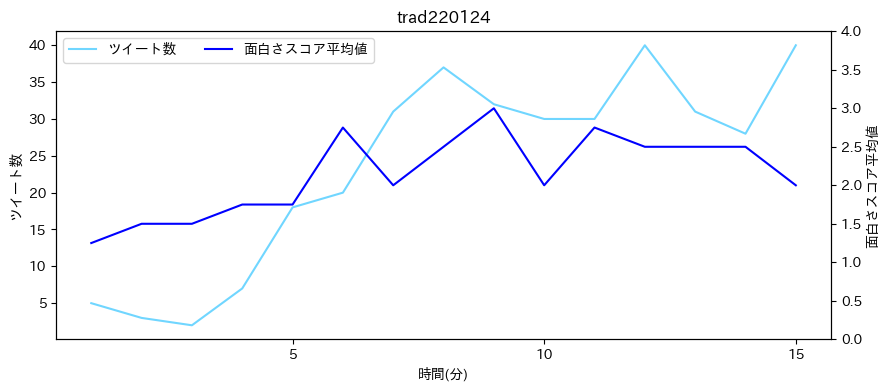

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlabel('時間(分)')
ax.set_ylabel('ツイート数')
ax.set_title("trad220124")
# ax.grid(False)
# ax.tick_params(axis='x')
# ax.tick_params(axis='y')
raw_num = len(df)
# ax.set_xlim(-0.5, raw_num+0.5)
ax.set_xticks(range(0, raw_num+1, 5))

# ax.set_ylim(0, 0.6)
ax.plot(df['created_at'], df['tweet'], color='#70d6ff', label='ツイート数')

ax2 = ax.twinx()
ax2.set_ylim(0, 4)
ax2.set_ylabel("面白さスコア平均値")
# ax2.tick_params(axis='y')
ax2.plot(df['created_at'], df['exp'],
         color='blue', label='面白さスコア平均値')
# ax2.grid(False)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper left', ncol=2)

plt.savefig("it_trad")


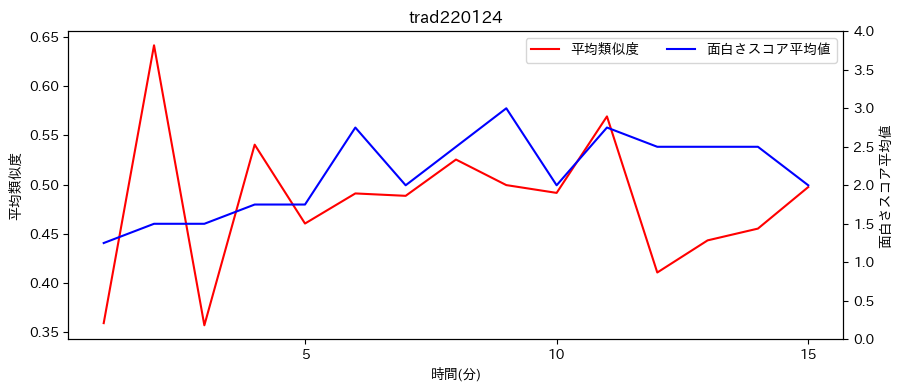

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlabel('時間(分)')
ax.set_ylabel('平均類似度')
ax.set_title("trad220124")
# ax.grid(False)
# ax.tick_params(axis='x')
# ax.tick_params(axis='y')
raw_num = len(df)
ax.set_xticks(range(0, raw_num+1, 5))
# ax.set_xlim(-0.5, raw_num+0.5)
# ax.set_xticks(range(0, raw_num+1, 1))

# ax.set_ylim(0, 0.6)
ax.plot(df['created_at'], df['mean'], color='red', label='平均類似度')

ax2 = ax.twinx()
ax2.set_ylim(0, 4)
ax2.set_ylabel("面白さスコア平均値")
# ax2.tick_params(axis='y')
ax2.plot(df['created_at'], df['exp'],
         color='blue', label='面白さスコア平均値')
# ax2.grid(False)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper right', ncol=2)

plt.savefig("is_trad")
